In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from modules import *
from sim import *


In [3]:
sim = Sim(9, "bturb1p0", "data_d52_l1_b5.npz", epsilon_SF=None)


Moving to directory '/home/za9132/scratch/romain/round9/bturb1p0'.


### quicklook

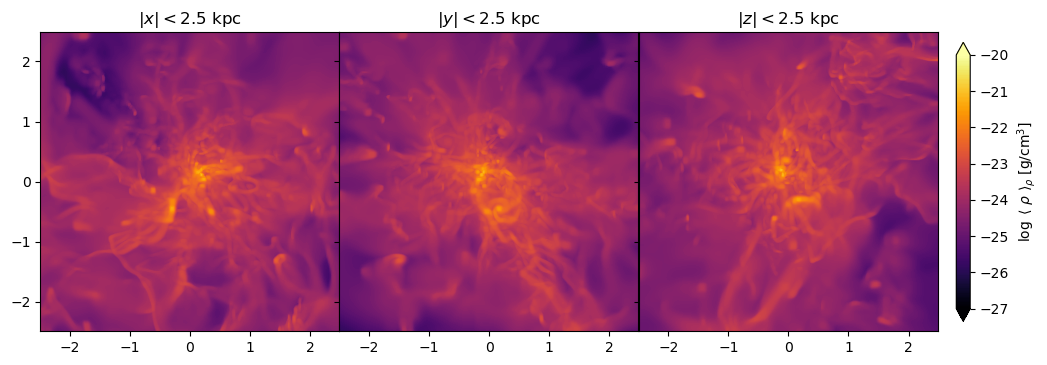

In [657]:
kwargs = {
    "field": "density",
    "extrema": (1e-27, 1e-20),
    "avg": True,
    "project": True,
    "slice": Arglist([[X, Y, Z]]),
    "title": Arglist([[r"$|x| < %.3g~{\rm kpc}$" % (sim.box_size/2/const.kpc), r"$|y| < %.3g~{\rm kpc}$" % (sim.box_size/2/const.kpc), r"$|z| < %.3g~{\rm kpc}$" % (sim.box_size/2/const.kpc)]]),
    "do_log": True,
    "cmap": 'inferno',
    "cbar_tick_increment": 1.,
    "cbar_label": r'$\log~\langle~\rho~\rangle_\rho$ [${\rm g/cm^{3}}$]'
}

sim.plot_grid(**kwargs, nrows=1, ncols=3, figsize=(12, 5), wspace=1e-3, hspace=None, sharey=True, share_cbar=True, do_axes_labels=False)


Text(0.5, 1.02, 'Variable $b_{\\rm turb}$\n$|z| < 2.5~{\\rm kpc}$')

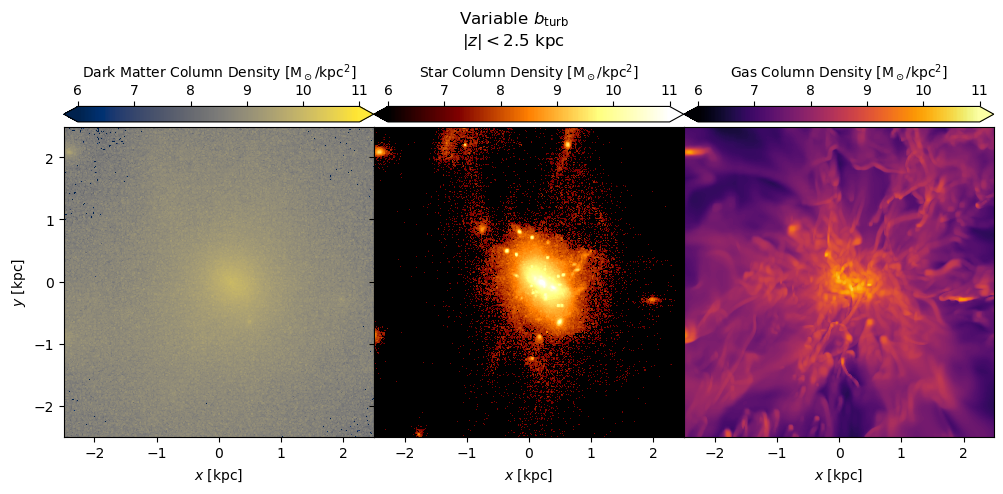

In [5]:
slice = Z
slice_label = ["x", "y", "z"][slice]

kwargs = {
    "field": Arglist([["density_dm", "density_star", "density"]]),
    "unit": const.M_sol / const.kpc**2,
    "extrema": (1e6, 1e11),
    "avg": False,
    "project": True,
    "slice": slice,
    "do_log": True,
    "cmap": Arglist([['cividis', 'afmhot', 'inferno']]),
    "cbar_tick_increment": 1.,
    "cbar_label": Arglist([[
        r'Dark Matter Column Density [${\rm M_\odot / kpc^2}$]',
        r'Star Column Density [${\rm M_\odot / kpc^2}$]',
        r'Gas Column Density [${\rm M_\odot / kpc^2}$]'
    ]]),
    "cbar_orientation": "horizontal",
    "max_pixels": 256
}

sim.plot_grid(**kwargs, nrows=1, ncols=3, figsize=(12, 5), wspace=1e-3, hspace=None, sharey=True)

plt.suptitle(sim.sim_latex + "\n" + r'$|%s| < %.3g~{\rm kpc}$' % (slice_label, sim.box_size/2/const.kpc), y=1.02)

# sim.save_fig("all-density-%s" % slice_label)


<Axes: title={'center': '$|z| < 1~{\\rm kpc}$'}, xlabel='$x$ [kpc]', ylabel='$y$ [kpc]'>

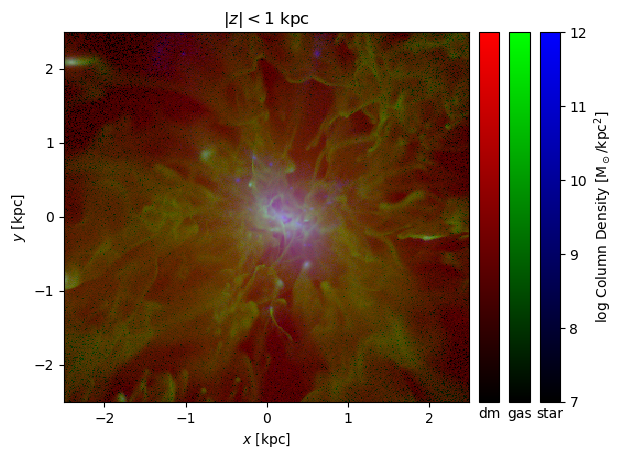

In [6]:
slice = Z
slice_label = ["x", "y", "z"][slice]
coord1_idx, coord2_idx = np.sort([(slice + 1) % 3, (slice + 2) % 3])

sim.plot("density_dm", "density", "density_star", (1e7, 1e12), unit=const.M_sol/const.kpc**2, xlabels=["dm", "gas", "star"], plot_type='rgb_slice', slice=slice, title=r'$|%s| < 1~{\rm kpc}$' % slice_label, project=True, do_log=True, avg=False, cbar_label=r'log Column Density [${\rm M_\odot / kpc^2}$]', cbar_tick_increment=1.)

# sim.save_fig("denisty-rgb-proj-%s" % slice_label)


### velocity field

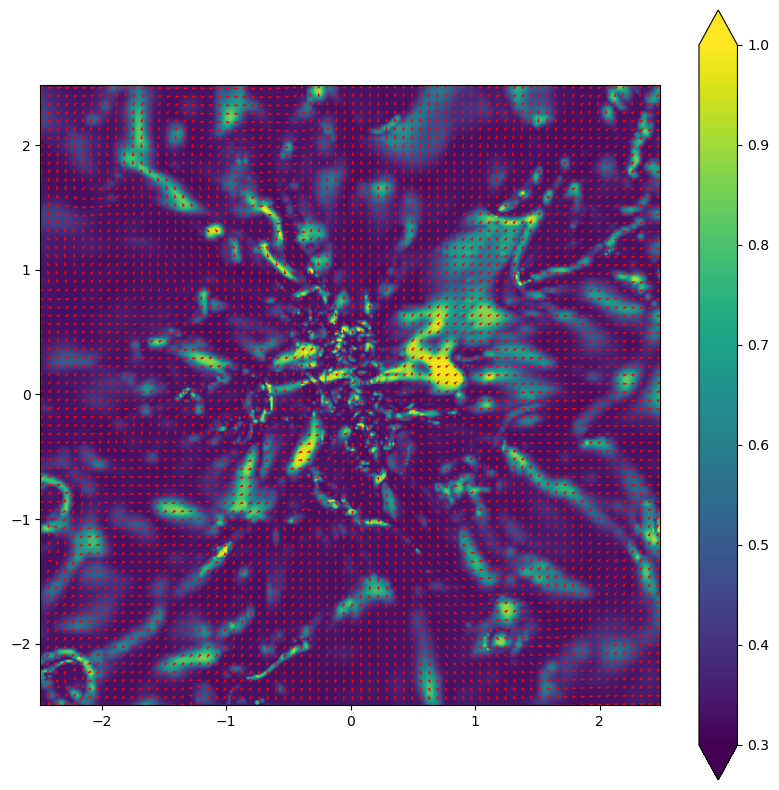

In [7]:
skip = 5

plt.figure(figsize=(10, 10))

x2d = sim.coord[X, :, :, sim.N//2] / const.kpc
y2d = sim.coord[Y, :, :, sim.N//2] / const.kpc
vx2d = sim.vel_vec[X, :, :, sim.N//2] / const.km
vy2d = sim.vel_vec[Y, :, :, sim.N//2] / const.km
vx2d_norm = vx2d / np.sqrt(vx2d**2 + vy2d**2)
vy2d_norm = vy2d / np.sqrt(vx2d**2 + vy2d**2)
bturb2d = sim.b_turb[:, :, sim.N//2]

im = plt.contourf(x2d.T, y2d.T, bturb2d, cmap='viridis', levels=np.linspace(0.3, 1.0, 200), extend='both')
#plt.streamplot(x2d.T, y2d.T, vx2d, vy2d, color='red', density=3)
plt.quiver(x2d[::skip, ::skip], y2d[::skip, ::skip], vx2d_norm[::skip, ::skip], vy2d_norm[::skip, ::skip], color='red', width=0.005)

cbar = plt.colorbar(im, ticks=np.arange(0.3, 1.1, 0.1))
plt.gca().set_aspect(True)


### jeans criterion

Text(0, 0.5, 'number of cells [$10^{6}$]')

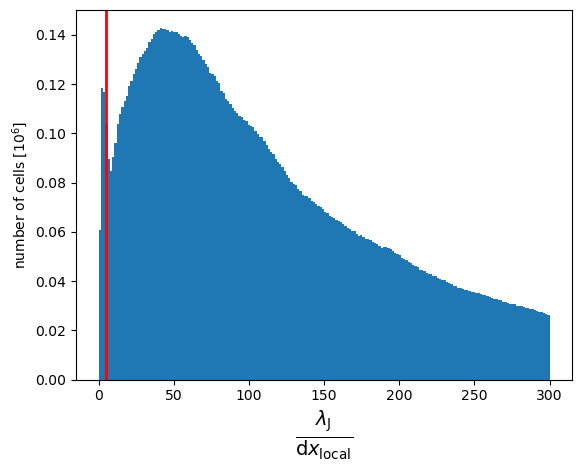

In [10]:
jeans_length = np.sqrt(5/3 * sim.pressure / sim.density) / np.sqrt(const.G * sim.density)
jeans_per_cell = jeans_length / sim.dx

plt.hist(jeans_per_cell.flatten(), range=(0, 300), bins=200, weights=np.full_like(jeans_per_cell.flatten(), 1e-6));
plt.axvline(x=5, lw=2, color='red')
plt.xlabel(r'$\frac{\lambda_{\rm J}}{{\rm d}x_{\rm local}}$', fontsize=20)
plt.ylabel("number of cells [$10^{6}$]")


### column density

In [126]:
density_sph = sim.interp_to_sph(sim.density)
col_density = np.sum(density_sph * sim.dx_sph[R], axis=R)


<Axes: title={'center': '$\\varepsilon_{\\rm SF} = 0.01$'}>

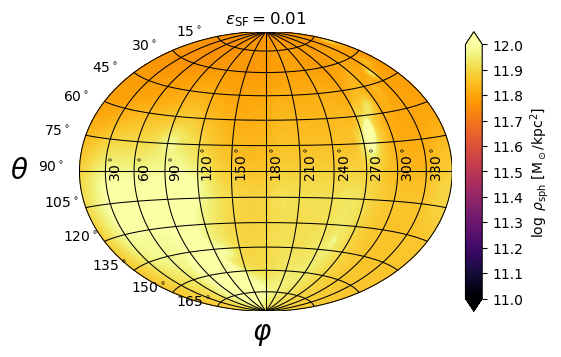

In [127]:
sim.plot(col_density, (10**(11), 10**(12)), unit=(const.M_sol/const.kpc**2), do_log=True, cmap='inferno', num_axis_lines=12, cbar_tick_increment=0.1, cbar_label=r'$\log~\rho_{\rm sph}$ [${\rm M_\odot/kpc^2}$]', title=sim.sim_latex, plot_type='AH') 

# sim.save_fig("dust-sph")


In [128]:
density_dust_sph = sim.interp_to_sph(sim.density_dust)
col_density_dust = np.sum(density_dust_sph * sim.dx_sph[R], axis=R)


<Axes: title={'center': '$\\varepsilon_{\\rm SF} = 0.01$'}>

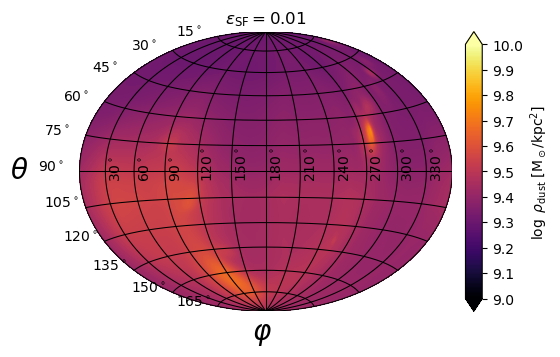

In [132]:
sim.plot(col_density_dust, (10**(9), 10**(10)), plot_type='AH', unit=(const.M_sol/const.kpc**2), do_log=True, cmap='inferno', num_axis_lines=12, cbar_tick_increment=0.1, cbar_label=r'$\log~\rho_{\rm dust}$ [${\rm M_\odot/kpc^2}$]', title=sim.sim_latex) 
    
# sim.save_fig("dust-sph")


### SFR

<Axes: xlabel='$x$ [kpc]', ylabel='$y$ [kpc]'>

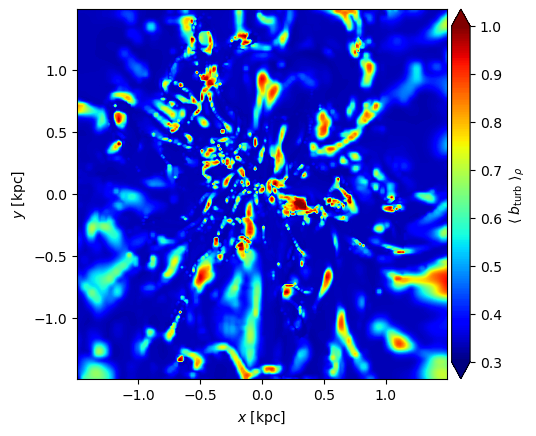

In [50]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.b_turb, (0.3, 1.), avg=True, slice=slice, weight=sim.density, project=False, do_log=False, cmap='jet', cbar_label=r'$\langle~b_{\rm turb}~\rangle_\rho$', cbar_tick_increment=0.1)

# save_fig("bturb-postprocess")


<Axes: xlabel='$x$ [kpc]', ylabel='$y$ [kpc]'>

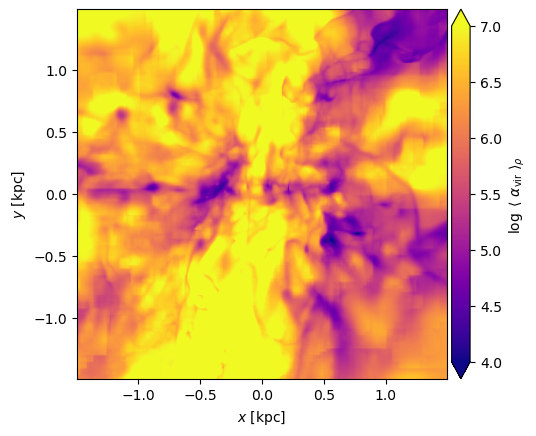

In [48]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.alpha_vir, (1e4, 1e7), avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='plasma', cbar_label=r'$\log~\langle~\alpha_{\rm vir}~\rangle_\rho$', cbar_tick_increment=0.5, isocontours=[sim.alpha_vir_crit])

# sim.save_fig("SFR-eps1p0-proj-%s" % slice_label)


In [41]:
slice = Z
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.SFR_density / (const.M_sol / const.yr / const.kpc**3), (1e-3, 1e5), title=r'$\varepsilon_{\rm SF} = 1.0$', avg=True, slice=slice, weight=sim.density, project=True, do_log=True, cmap='plasma', cbar_label=r'$\log~\langle~\dot{\rho}_*~\rangle_\rho$ [${\rm M_\odot/yr/kpc^3}$]', cbar_tick_increment=0.5)

# sim.save_fig("SFR-eps1p0-proj-%s" % slice_label)


TypeError: calc_epsilon_SF() missing 2 required positional arguments: 'temp' and 'dx'

### gas properties

<Axes: title={'center': '$|x| < 1~{\\rm kpc}$'}, xlabel='$y$ [kpc]', ylabel='$z$ [kpc]'>

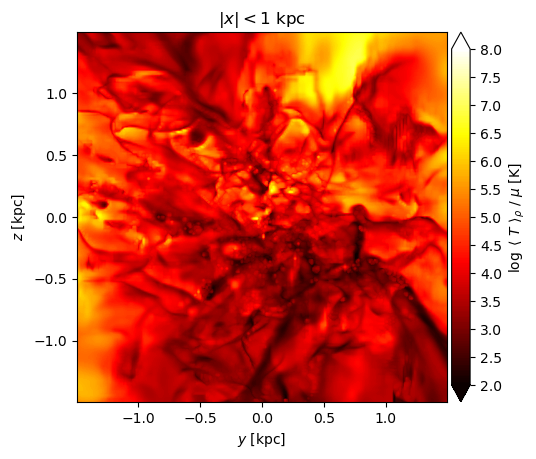

In [51]:
slice = X
slice_label = ["x", "y", "z"][slice]

sim.plot(sim.temp, (1e2, 1e8), title=r'$|%s| < 1~{\rm kpc}$' % slice_label, avg=True, slice=slice, weight=sim.density**2, project=True, do_log=True, cmap='hot', cbar_label=r'$\log~\langle~T~\rangle_\rho~/~\mu$ [K]', cbar_tick_increment=0.5)

# sim.save_fig("temp-proj-%s" % slice_label)


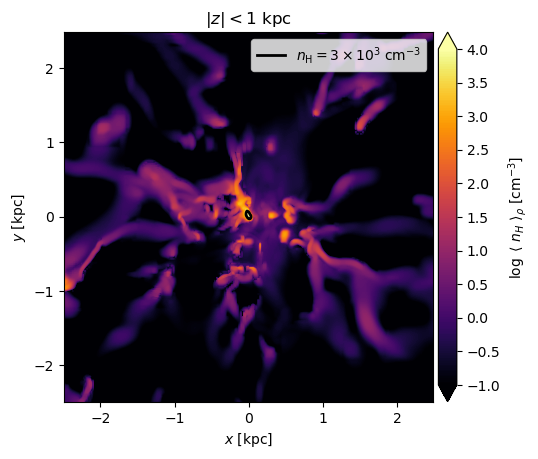

In [44]:
slice = Z
slice_label = ["x", "y", "z"][slice]

n_H_crit_ffb = 3e3
cond_ffb = sim.n_H < n_H_crit_ffb

ax = sim.plot(sim.n_H, (1e-1, 1e4), title=r'$|%s| < 1~{\rm kpc}$' % slice_label, avg=True, slice=slice, weight="density", project=False, do_log=True, cmap='inferno', cbar_label=r'$\log~\langle~n_H~\rangle_\rho$ [${\rm cm^{-3}}$]', cbar_tick_increment=0.5, isocontours=[n_H_crit_ffb])

custom_lines = [Line2D([0], [0], color='black', lw=2)]
ax.legend(custom_lines, [r'$n_{\rm H} = 3\times 10^{3}~{\rm cm^{-3}}$'])

# sim.save_fig("density-proj-%s" % slice_label)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


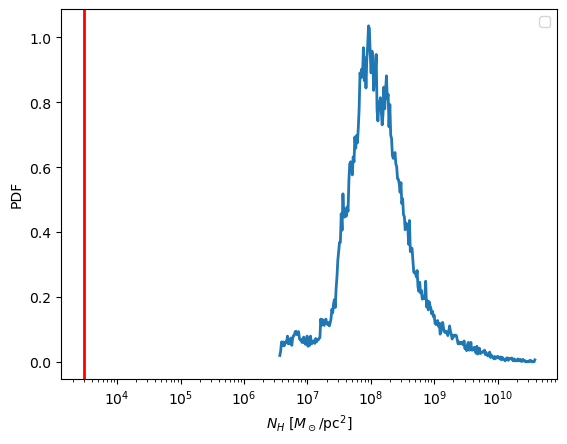

In [53]:
nbins = 300
Sigma_ffb = 3e3 * const.M_sol / const.pc**2
unit = const.M_sol / const.pc**2

for slice in [X]:

    N_H = np.sum(sim.density * sim.length_unit, axis=slice)

    hist, bins = np.histogram(np.log10(N_H), weights=None, bins=nbins)
    N_H_1d = 10**(bins[:-1] + np.diff(bins)[0])
    pixel_1d = hist
    pixel_pdf_1d = pixel_1d / np.sum(pixel_1d) / np.diff(bins)[0]
    plt.plot(N_H_1d / unit, pixel_pdf_1d, lw=2)

plt.legend()
plt.xscale('log')
plt.xlabel(r'$N_H$ [$M_\odot / {\rm pc^2}$]')
plt.ylabel(r'PDF')

plt.axvline(x=Sigma_ffb/unit, color='red', lw=2)

# save_fig("star-density-pdf", subdir=os.path.join("round%d" % sim_round, sim_name))



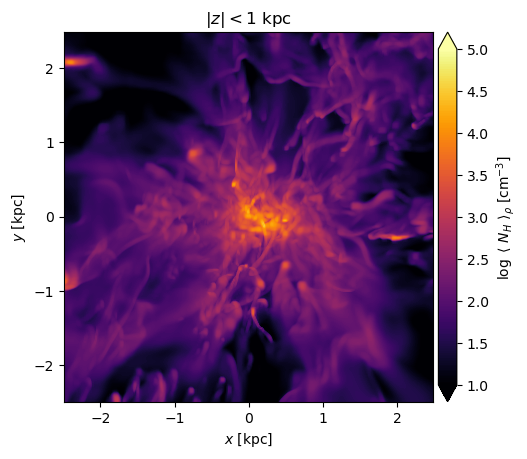

In [43]:
slice = Z
slice_label = ["x", "y", "z"][slice]

ax = sim.plot(sim.density, (1e1, 1e5), unit=(const.M_sol / const.pc**2), title=r'$|%s| < 1~{\rm kpc}$' % slice_label, avg=False, slice=slice, do_integrate=True, project=True, do_log=True, cmap='inferno', cbar_label=r'$\log~\langle~N_H~\rangle_\rho$ [${\rm cm^{-3}}$]', cbar_tick_increment=0.5)


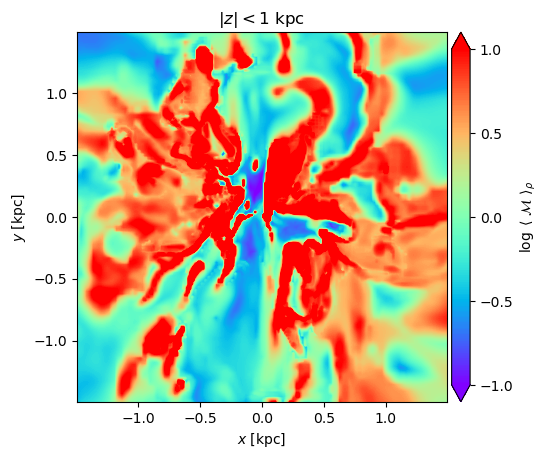

In [54]:
slice = Z
slice_label = ["x", "y", "z"][slice]

ax = sim.plot(sim.mach_turb, (1e-1, 1e1), title=r'$|%s| < %d~{\rm kpc}$' % (slice_label, sim.box_size/const.kpc/2), avg=True, slice=slice, project=False, do_log=True, cmap='rainbow', cbar_label=r'$\log~\langle~\mathcal{M}~\rangle_\rho$', cbar_tick_increment=0.5)

# sim.save_fig("density-proj-%s" % slice_label)


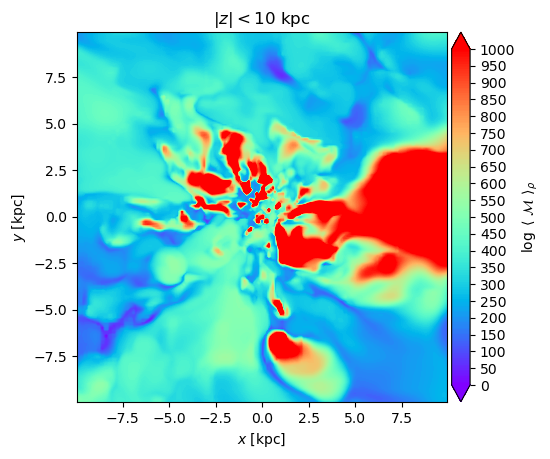

In [30]:
slice = Z
slice_label = ["x", "y", "z"][slice]

ax = sim.plot(sim.vel / const.km, (0, 1000), title=r'$|%s| < %d~{\rm kpc}$' % (slice_label, sim.box_size/const.kpc/2), avg=True, slice=slice, project=False, do_log=False, cmap='rainbow', cbar_label=r'$\log~\langle~\mathcal{M}~\rangle_\rho$', cbar_tick_increment=50)

# sim.save_fig("density-proj-%s" % slice_label)



Saved figure as 'alpha_vir_mach_phase_bigbox-112020232220.png'


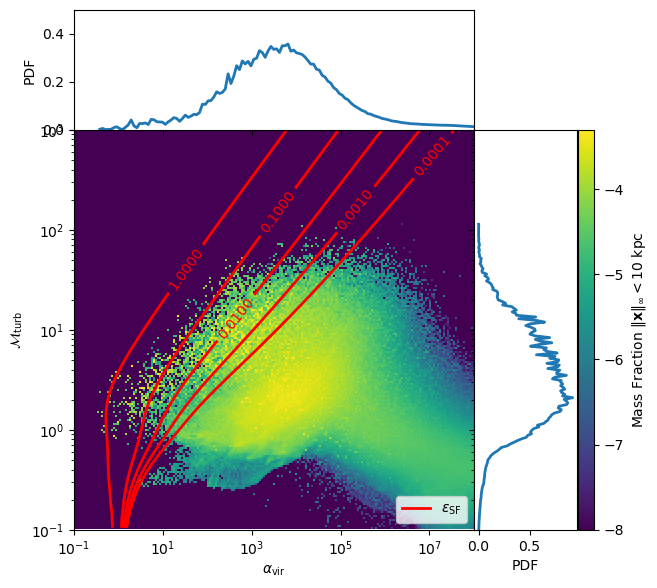

In [44]:
nbins=200
alpha_vir_extrema = (1e-1, 1e8)
mach_turb_extrema = (1e-1, 1e3)
mass_frac_extrema = (1e-8, 5e-4)
alpha_vir_crit = 10

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])

alpha_vir_1d, mach_turb_1d, mass_2d = sim.calc_phase(sim.alpha_vir, sim.mach_turb, alpha_vir_extrema, mach_turb_extrema, nbins=nbins)
mass_frac_2d = mass_2d / np.sum(sim.density * sim.dV)
im = ax1.pcolormesh(alpha_vir_1d, mach_turb_1d, np.log10(mass_frac_2d + epsilon), vmin=np.log10(mass_frac_extrema[0]), vmax=np.log10(mass_frac_extrema[1]))

ax1.set_xlabel(r"$\alpha_{\rm vir}$")
ax1.set_ylabel(r"$\mathcal{M}_{\rm turb}$")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(alpha_vir_extrema[0], alpha_vir_extrema[1])
ax1.set_ylim(mach_turb_extrema[0], mach_turb_extrema[1])
#ax1.axvline(x=alpha_vir_crit, color='red', lw=2)

alpha_vir_2d, mach_turb_2d = np.meshgrid(alpha_vir_1d, mach_turb_1d, indexing='ij')
epsilon_SF = calc_epsilon_SF_old(alpha_vir_2d, mach_turb_2d)
cs = plt.contour(alpha_vir_2d, mach_turb_2d, epsilon_SF, levels=[1e-4, 1e-3, 1e-2, 1e-1, 1e0], colors=['red', 'red', 'red', 'red'], linewidths=2)
plt.clabel(cs, [1e-4, 1e-3, 1e-2, 1e-1, 1e0])

custom_lines = [Line2D([0], [0], color='red', lw=2)]
ax1.legend(custom_lines, [r'$\varepsilon_{\rm SF}$'], loc=4)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.alpha_vir).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
alpha_vir_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax2.plot(alpha_vir_1d, mass_pdf_1d, lw=2)
#ax2.axvline(x=alpha_vir_crit, color='red', lw=2)

ax2.set_ylabel("PDF")
ax2.set_ylim(0, 0.5)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.mach_turb).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
mach_turb_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax3.plot(mass_pdf_1d, mach_turb_1d, lw=2)

ax3.set_xlabel("PDF")

cbar_ticks = np.arange(np.log10(mass_frac_extrema[0]), np.log10(mass_frac_extrema[1])+1)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="15%", pad=0.01)
plt.colorbar(im, ax=ax1, cax=cax, ticks=cbar_ticks, label=r"Mass Fraction $\|\mathbf{x}\|_\infty < %d~{\rm kpc}$" % (sim.box_size/const.kpc/2))

save_fig("alpha_vir_mach_phase_bigbox")


Saved figure as 'vturb-nH-phase-gas-bigbox-112720232204.png'


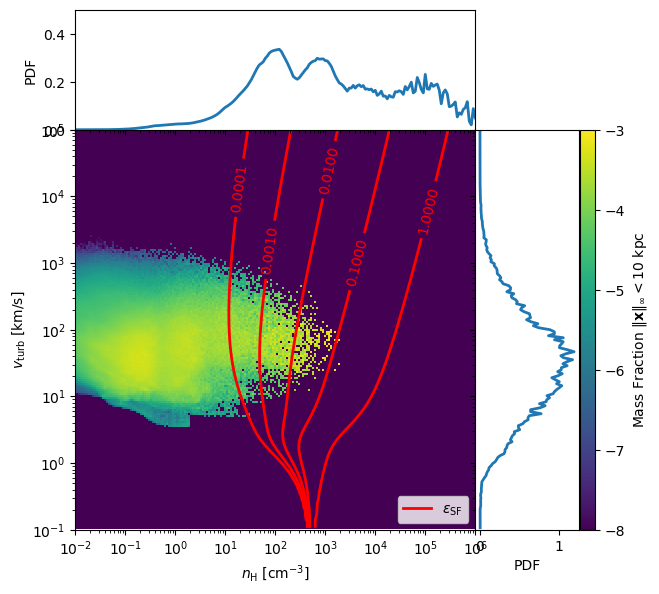

In [29]:
nbins = 200
n_H_extrema = (1e-2, 1e6)
vel_turb_extrema = (1e-1 * const.km, 1e5 * const.km)
mass_frac_extrema = (1e-8, 1e-3)

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])

n_H_1d, vel_turb_1d, mass_2d = sim.calc_phase(sim.n_H, sim.vel_turb, n_H_extrema, vel_turb_extrema, nbins=nbins)
mass_frac_2d = mass_2d / np.sum(sim.density * sim.dV)
im = ax1.pcolormesh(n_H_1d, vel_turb_1d / const.km, np.log10(mass_frac_2d + epsilon), vmin=np.log10(mass_frac_extrema[0]), vmax=np.log10(mass_frac_extrema[1]))

ax1.set_xlabel(r"$n_{\rm H}$ [${\rm cm^{-3}}$]")
ax1.set_ylabel(r"$v_{\rm turb}$ [${\rm km/s}$]")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(*n_H_extrema)
ax1.set_ylim(vel_turb_extrema[0] / const.km, vel_turb_extrema[1] / const.km)

n_H_2d, vel_turb_2d = np.meshgrid(n_H_1d, vel_turb_1d, indexing='ij')
rho_2d = n_H_2d * const.m_p
epsilon_SF = calc_epsilon_SF(rho_2d, vel_turb_2d, b_turb=1.0)

cs = plt.contour(n_H_2d, vel_turb_2d / const.km, epsilon_SF, levels=[1e-4, 1e-3, 1e-2, 1e-1, 1e0], colors='red', linewidths=2)
plt.clabel(cs, [1e-4, 1e-3, 1e-2, 1e-1, 1e0])

custom_lines = [Line2D([0], [0], color='red', lw=2)]
ax1.legend(custom_lines, [r'$\varepsilon_{\rm SF}$'], loc=4)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.n_H).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
alpha_vir_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax2.plot(n_H_1d, mass_pdf_1d, lw=2)
#ax2.axvline(x=alpha_vir_crit, color='red', lw=2)

ax2.set_ylabel("PDF")
ax2.set_ylim(0, 0.5)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.vel_turb).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
mach_turb_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax3.plot(mass_pdf_1d, vel_turb_1d / const.km, lw=2)

ax3.set_xlabel("PDF")

cbar_ticks = np.arange(np.log10(mass_frac_extrema[0]), np.log10(mass_frac_extrema[1])+1)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="15%", pad=0.01)
plt.colorbar(im, ax=ax1, cax=cax, ticks=cbar_ticks, label=r"Mass Fraction $\|\mathbf{x}\|_\infty < %d~{\rm kpc}$" % (sim.box_size/const.kpc/2))

save_fig("vturb-nH-phase-gas-bigbox")


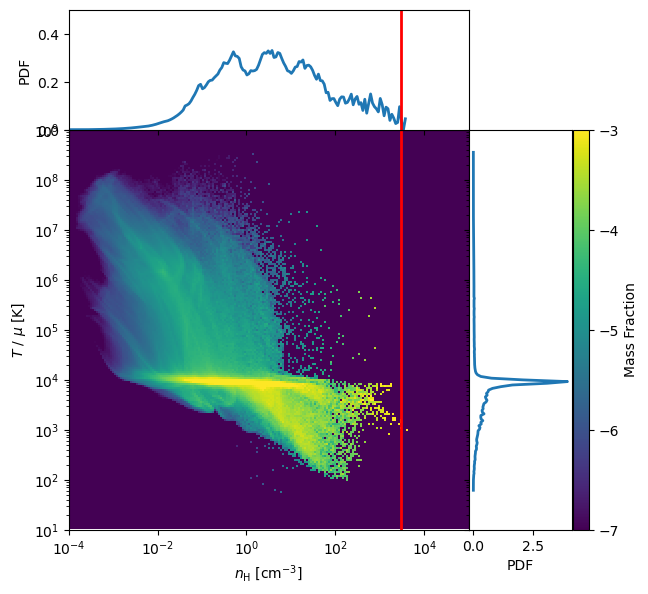

In [107]:
nbins=200
ffb_density = 3e3
n_H_extrema = (1e-4, 1e5)
temp_extrema = (1e1, 1e9)
mass_frac_extrema = (1e-7, 1e-3)

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])

n_H_2d, temperature_2d, mass_2d = sim.calc_phase(sim.n_H, sim.temp, n_H_extrema, temp_extrema, nbins=nbins)
mass_frac_2d = mass_2d / np.sum(sim.density * sim.dV)
im = ax1.pcolormesh(n_H_2d, temperature_2d, np.log10(mass_frac_2d + epsilon), vmin=np.log10(mass_frac_extrema[0]), vmax=np.log10(mass_frac_extrema[1]))

ax1.set_xlabel(r"$n_{\rm H}$ [${\rm cm^{-3}}$]")
ax1.set_ylabel(r"$T~/~\mu$ [K]")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(n_H_extrema[0], n_H_extrema[1])
ax1.set_ylim(temp_extrema[0], temp_extrema[1])
ax1.axvline(x=ffb_density, color='red', lw=2)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.n_H).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
n_H_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax2.plot(n_H_1d, mass_pdf_1d, lw=2)
ax2.axvline(x=ffb_density, lw=2, color='red')

ax2.set_ylabel("PDF")
ax2.set_ylim(0, 0.5)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.temp).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
temp_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax3.plot(mass_pdf_1d, temp_1d, lw=2)

ax3.set_xlabel("PDF")

cbar_ticks = np.arange(np.log10(mass_frac_extrema[0]), np.log10(mass_frac_extrema[1])+1)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="15%", pad=0.01)
plt.colorbar(im, ax=ax1, cax=cax, ticks=cbar_ticks, label=r"Mass Fraction")

# sim.save_fig("density-temp-phase")


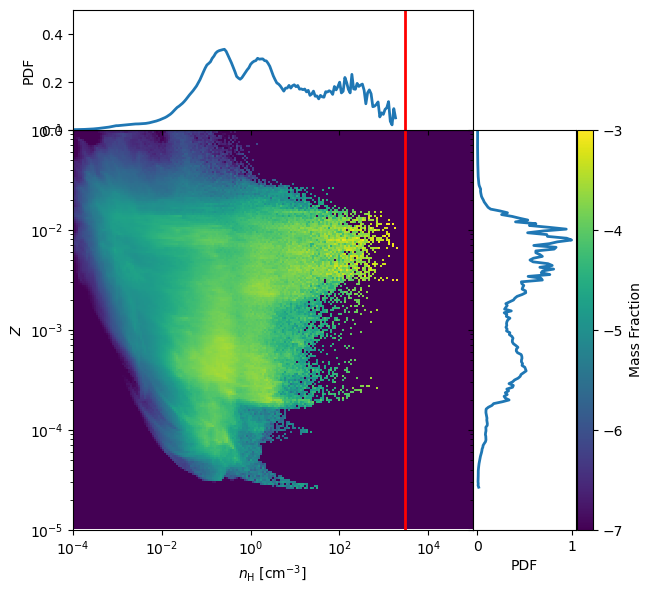

In [90]:
nbins=200
ffb_density = 3e3
n_H_extrema = (1e-4, 1e5)
metallicity_extrema = (1e-5, 1e-1)
mass_frac_extrema = (1e-7, 1e-3)

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])

n_H_2d, metallicity_2d, mass_2d = sim.calc_phase(sim.n_H, sim.metallicity, n_H_extrema, metallicity_extrema, nbins=nbins)
mass_frac_2d = mass_2d / np.sum(sim.density * sim.dV)
im = ax1.pcolormesh(n_H_2d, metallicity_2d, np.log10(mass_frac_2d + epsilon), vmin=np.log10(mass_frac_extrema[0]), vmax=np.log10(mass_frac_extrema[1]))

ax1.set_xlabel(r"$n_{\rm H}$ [${\rm cm^{-3}}$]")
ax1.set_ylabel(r"$Z$")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(n_H_extrema[0], n_H_extrema[1])
ax1.set_ylim(metallicity_extrema[0], metallicity_extrema[1])
ax1.axvline(x=ffb_density, color='red', lw=2)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.n_H).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
n_H_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax2.plot(n_H_1d, mass_pdf_1d, lw=2)
ax2.axvline(x=ffb_density, lw=2, color='red')

ax2.set_ylabel("PDF")
ax2.set_ylim(0, 0.5)

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False);

hist, bins = np.histogram(np.log10(sim.metallicity).flatten(), weights=(sim.density * sim.dV).flatten(), bins=nbins)
metallicity_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(sim.density * sim.dV) / np.diff(bins)[0]
ax3.plot(mass_pdf_1d, metallicity_1d, lw=2)

ax3.set_xlabel("PDF")

cbar_ticks = np.arange(np.log10(mass_frac_extrema[0]), np.log10(mass_frac_extrema[1])+1)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="15%", pad=0.01)
plt.colorbar(im, ax=ax1, cax=cax, ticks=cbar_ticks, label=r"Mass Fraction")

# sim.save_fig("density-temp-phase")


In [126]:
r1d, density1d = sim.calc_radial_profile(sim.density, nbins=50)


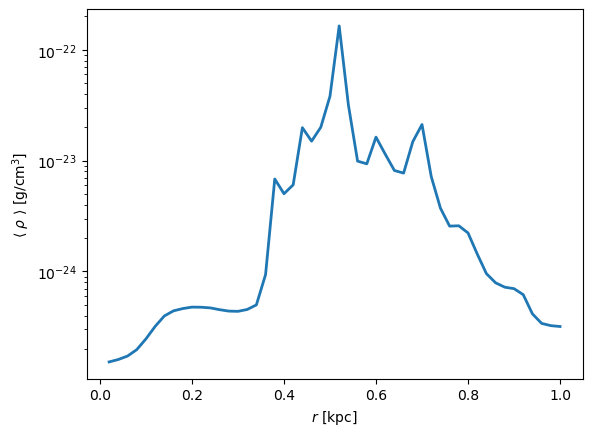

In [128]:
plt.plot(r1d / const.kpc, density1d, lw=2)

plt.xlabel(r'$r$ [kpc]')
plt.ylabel(r'$\langle~\rho~\rangle$ [${\rm g/cm^3}$]')

plt.yscale('log')

# sim.save_fig("density-1d")


### Summary Statistics

In [55]:
sim.print_stats()

Field                   Max       Min        Mean/Value  Unit
----------------------  --------  -------  ------------  ------
density                 4.99e-20  4.4e-28      7.86e-24  g/cm^3
temperature             3.94e+08  27.5           338000  K
ionization frac         1         0               0.219
metallicity             8.12      0.0404          0.542  Z_sol
mach number             1.07e+03  0.00612           130
turbulent mach number   392       0.0213           26.8
star age                292       0.00173          47.5  Myr
star part number                                 766000
DM part number                                   421000
contamination fraction                                0


### angular momentum

#### find the center using the shrinking sphere method

In [4]:
density = sim.density

radius_sphere_init = 1 * const.kpc
frac_shrink = 0.99
num_iter = 10

radius_sphere_list = np.zeros((num_iter + 1)) 
radius_sphere_list[0] = radius_sphere_init
coord_center_list = np.zeros((num_iter + 1, 3))

for i in range(num_iter):
    coord_rel_center = sim.coord - coord_center_list[i, :, None, None, None]
    r_rel_center = np.sqrt(np.sum(coord_rel_center**2, axis=0))
    cond_sph = r_rel_center < radius_sphere_list[i]
    weight_sph = np.cos(np.pi / 2 / radius_sphere_list[i] * r_rel_center)
    coord_center_list[i + 1] = np.sum(cond_sph * sim.coord * density, axis=(1,2,3)) / np.sum(cond_sph * density)
    radius_sphere_list[i + 1] = radius_sphere_list[i] * frac_shrink
    print(i, end="")


0123456789

(-300.0, 300.0)

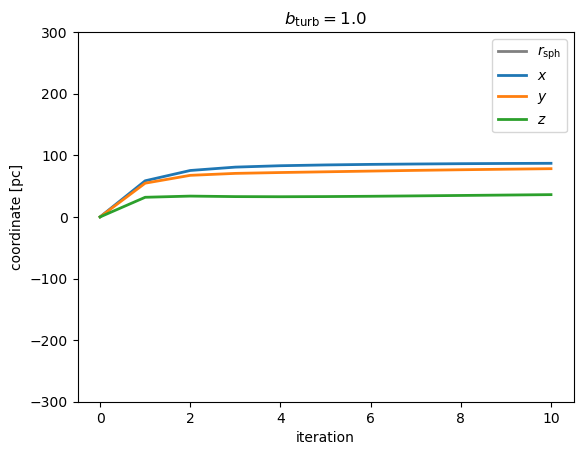

In [5]:
plt.plot(radius_sphere_list / const.pc, color='grey', lw=2, label=r'$r_{\rm sph}$')

plt.plot(coord_center_list[:, X] / const.pc, label=r'$x$', lw=2, color='C0')
plt.plot(coord_center_list[:, Y] / const.pc, label=r'$y$', lw=2, color='C1')
plt.plot(coord_center_list[:, Z] / const.pc, label=r'$z$', lw=2, color='C2')

plt.legend()
plt.xlabel('iteration')
plt.ylabel(r'coordinate [pc]')
plt.title(sim.sim_latex)

plt.ylim(-300, 300)

# save_fig('bturb0p3-shrinking-sph')


In [6]:
coord_center = coord_center_list[10]
coord_rel_center = sim.coord - coord_center[:, None, None, None]
r_center = np.sqrt(np.sum(coord_rel_center**2, axis=0))

r_1d, rho_1d = calc_1d_profile(r_center, density, extrema=(0, 3*const.kpc), do_log_x=False, nbins=200)


Text(0.5, 1.0, '$b_{\\rm turb} = 1.0$')

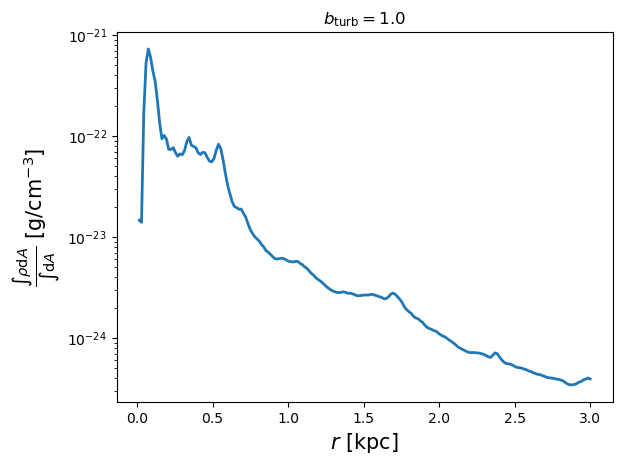

In [8]:
plt.plot(r_1d / const.kpc, rho_1d, lw=2)

plt.xlabel(r'$r$ [kpc]', fontsize=15)
plt.ylabel(r'$\frac{\int \rho {\rm d}A}{\int {\rm d}A}$ [${\rm g/cm^{-3}}$]', fontsize=15)
plt.yscale('log')
plt.title(sim.sim_latex)

# save_fig('bturb0p3-dens1d')


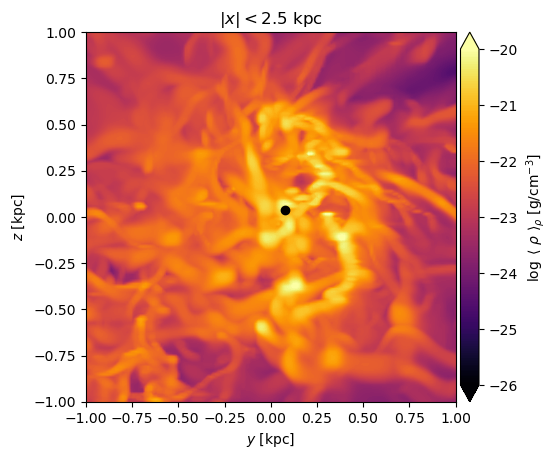

In [9]:
slice = X
slice_label = ["x", "y", "z"][slice]

ax = sim.plot(density, (1e-26, 1e-20), width=(1 * const.kpc), title=r'$|%s| < %.2g~{\rm kpc}$' % (slice_label, sim.box_size/2/const.kpc), avg=True, slice=slice, weight="density", project=True, do_log=True, cmap='inferno', cbar_label=r'$\log~\langle~\rho~\rangle_\rho$ [${\rm g/cm^{-3}}$]', cbar_tick_increment=1.0)

idx_coord1, idx_coord2 = np.sort([(slice + 1) % 3, (slice + 2) % 3])
ax.plot(coord_center[idx_coord1] / const.kpc, coord_center[idx_coord2] / const.kpc, 'o', color='black')



#### compute the bulk velocity

In [715]:
r_1d, vx_1d = calc_1d_profile(r_center, sim.vel_vec[X], extrema=(0, 3*const.kpc), do_log_x=False, nbins=200, weight=density, do_cum=True)
r_1d, vy_1d = calc_1d_profile(r_center, sim.vel_vec[Y], extrema=(0, 3*const.kpc), do_log_x=False, nbins=200, weight=density, do_cum=True)
r_1d, vz_1d = calc_1d_profile(r_center, sim.vel_vec[Z], extrema=(0, 3*const.kpc), do_log_x=False, nbins=200, weight=density, do_cum=True)


(-300.0, 300.0)

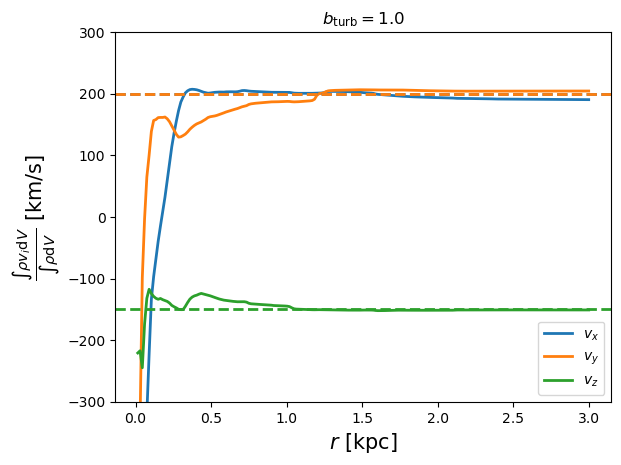

In [724]:
plt.plot(r_1d / const.kpc, vx_1d / const.km, lw=2, label=r'$v_x$', color='C0')
plt.plot(r_1d / const.kpc, vy_1d / const.km, lw=2, label=r'$v_y$', color='C1')
plt.plot(r_1d / const.kpc, vz_1d / const.km, lw=2, label=r'$v_z$', color='C2')

plt.xlabel(r'$r$ [kpc]', fontsize=15)
plt.ylabel(r"$\frac{\int \rho v_i {\rm d}V}{\int \rho {\rm d}V}$ [${\rm km/s}$]", fontsize=15)
plt.legend()
plt.title(sim.sim_latex)

vx_bulk = 200 * const.km
vy_bulk = 200 * const.km
vz_bulk = -150 * const.km

plt.axhline(y=vx_bulk / const.km, lw=2, linestyle='--', color='C0')
plt.axhline(y=vy_bulk / const.km, lw=2, linestyle='--', color='C1')
plt.axhline(y=vz_bulk / const.km, lw=2, linestyle='--', color='C2')

plt.ylim(-300, 300)

# save_fig('bturb0p3-vbulk')


#### compute the specific angular momentum

In [725]:
vel_rel_bulk = sim.vel_vec - np.array([vx_bulk, vy_bulk, vz_bulk])[:, None, None, None]
l_mom = np.cross(coord_rel_center, vel_rel_bulk, axisa=0, axisb=0, axisc=0)

r_1d, lx_1d = calc_1d_profile(r_center, l_mom[X], extrema=(0, 3*const.kpc), do_log_x=False, nbins=200, weight=density, do_cum=True)
r_1d, ly_1d = calc_1d_profile(r_center, l_mom[Y], extrema=(0, 3*const.kpc), do_log_x=False, nbins=200, weight=density, do_cum=True)
r_1d, lz_1d = calc_1d_profile(r_center, l_mom[Z], extrema=(0, 3*const.kpc), do_log_x=False, nbins=200, weight=density, do_cum=True)

jx_1d = lx_1d / np.sqrt(lx_1d**2 + ly_1d**2 + lz_1d**2)
jy_1d = ly_1d / np.sqrt(lx_1d**2 + ly_1d**2 + lz_1d**2)
jz_1d = lz_1d / np.sqrt(lx_1d**2 + ly_1d**2 + lz_1d**2)


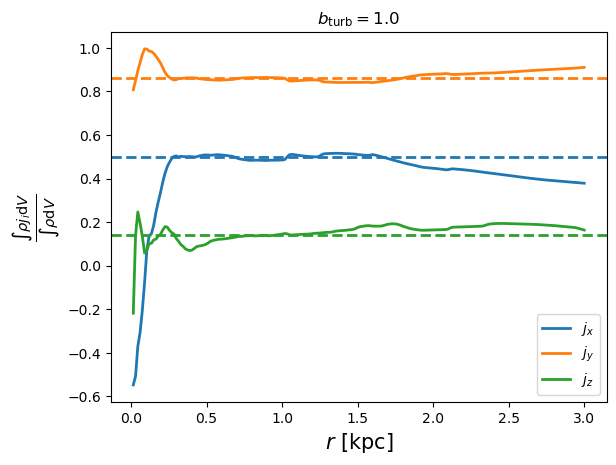

In [735]:
plt.plot(r_1d / const.kpc, jx_1d, lw=2, label=r'$j_x$', color='C0')
plt.plot(r_1d / const.kpc, jy_1d, lw=2, label=r'$j_y$', color='C1')
plt.plot(r_1d / const.kpc, jz_1d, lw=2, label=r'$j_z$', color='C2')

plt.xlabel(r'$r$ [kpc]', fontsize=15)
plt.ylabel(r"$\frac{\int \rho j_i {\rm d}V}{\int \rho {\rm d}V}$", fontsize=15)
plt.legend()
plt.title(sim.sim_latex)

j_disk = np.array([0.5, 0.86, 0.14])
#j_disk = j_disk / norm(j_disk)

plt.axhline(y=j_disk[X], lw=2, linestyle='--', color='C0')
plt.axhline(y=j_disk[Y], lw=2, linestyle='--', color='C1')
plt.axhline(y=j_disk[Z], lw=2, linestyle='--', color='C2')

# save_fig('bturb0p3-angmom')


In [762]:
def getimgplane_anyaxis(coord_center, size_img, vec_camera, vec_north=np.array([1, 0, 0]), num_pxl=128):
    '''
    Get the image plane perpendicular to any axis.
    
    Args
    coord_center: coordinate of the center of the image plane
    size_img (float): width of the image [cm]
    vec_camera: vector orieted perpendicular to the projection plane
    vec_north: vector oriented upwards in the image
    num_pxl (int): width of the image in pixels
    
    Returns
    vec_coord1, vec_coord2: image plane vectors
    coord_pxl: pixel coordinate array
    '''
    # compute the image plane vectors
    vec_coord2 = np.cross(vec_north, vec_camera)
    vec_coord2 = vec_coord2 / norm(vec_coord2)
    vec_coord1 = -np.cross(vec_coord2, vec_camera)
    vec_coord1 = vec_coord1 / norm(vec_coord1)
    
    # compute the pixel coordinate array
    arr_pxl = np.linspace(-size_img/2, size_img/2, num_pxl)
    coord_pxl = coord_center[:, None, None] + vec_coord1[:, None, None] * arr_pxl[None, :, None] + vec_coord2[:, None, None] * arr_pxl[None, None, :]

    return vec_coord1, vec_coord2, coord_pxl
    

In [846]:
def slice_axis(field, coord_center, size_img, idx_axis):
    '''
    Slice a field along a grid axis.
    
    Args
    field: field
    coord_center: coordinate of the center of the image
    size_img: width of the image [cm]
    idx_axis: index of the slice axis
    
    img: image of the field in the slice plane
    '''
    idx_coord1, idx_coord2 = np.sort([(idx_axis+1)%3, (idx_axis+2)%3])
    idx_slice = np.searchsorted(sim.coord1d[idx_axis], coord_center[idx_axis])
    
    idx_left = np.searchsorted(sim.coord1d[idx_coord1], coord_center[idx_coord1] - size_img/2)
    idx_right = np.searchsorted(sim.coord1d[idx_coord1], coord_center[idx_coord1] + size_img/2)
    idx_bottom = np.searchsorted(sim.coord1d[idx_coord2], coord_center[idx_coord2] - size_img/2)
    idx_top = np.searchsorted(sim.coord1d[idx_coord2], coord_center[idx_coord2] + size_img/2)
    
    img = field.take(indices=idx_axis, axis=idx_axis)[idx_left:idx_right, idx_bottom:idx_top]
    return img
    

In [763]:
def slice_anyaxis(field, coord_center, size_img, vec_camera, vec_north=np.array([1, 0, 0]), num_pxl=128):
    '''
    Slice a field along any axis.
    
    Args
    field: field
    coord_center: coordinate of the center of the image plane
    size_img (float): width of the image [cm]
    vec_camera: vector orieted perpendicular to the projection plane
    vec_north: vector oriented upwards in the image
    num_pxl (int): width of the image in pixels
    
    Returns
    vec_coord1, vec_coord2: image plane vectors
    img: image of the field in the slice plane
    '''
    vec_coord1, vec_coord2, coord_pxl = getimgplane_anyaxis(coord_center, size_img, vec_camera, vec_north=vec_north, num_pxl=num_pxl)
    idx_pxl = np.array([np.searchsorted(sim.coord1d[i], coord_pxl[i]) for i in [X, Y, Z]])
    img = field[tuple(idx_pxl)]
    return vec_coord1, vec_coord2, img
    

In [15]:
def proj_axis(field, coord_center, size_img, size_sample, idx_axis, weight=None):
    '''
    Project a field along a grid axis.
    
    Args
    field: field
    coord_center: coordinate of the center of the image plane
    size_img (float): width of the image [cm]
    size_sample (float): length to sample for the projection [cm]
    idx_axis: index of the slice axis
    weight: weight
    
    Returns
    img: projected image of the field 
    '''
    if np.all(weight) == None: weight = np.ones_like(field)
    field_weighted = field * weight
    
    idx_coord1, idx_coord2 = np.sort([(idx_axis+1)%3, (idx_axis+2)%3])
    
    idx_left = np.searchsorted(sim.coord1d[idx_coord1], coord_center[idx_coord1] - size_img/2)
    idx_right = np.searchsorted(sim.coord1d[idx_coord1], coord_center[idx_coord1] + size_img/2)
    idx_bottom = np.searchsorted(sim.coord1d[idx_coord2], coord_center[idx_coord2] - size_img/2)
    idx_top = np.searchsorted(sim.coord1d[idx_coord2], coord_center[idx_coord2] + size_img/2)
    idx_back = np.searchsorted(sim.coord1d[idx_axis], coord_center[idx_axis] - size_sample/2)
    idx_for = np.searchsorted(sim.coord1d[idx_axis], coord_center[idx_axis] + size_sample/2)
    
    field = field.take(np.arange(idx_back, idx_for), axis=idx_axis)
    field_weighted = field_weighted.take(np.arange(idx_back, idx_for), axis=idx_axis)
    img = (np.sum(field_weighted, axis=idx_axis) / np.sum(weight, axis=idx_axis))[idx_left:idx_right, idx_bottom:idx_top]
    return img
    

In [764]:
def proj_anyaxis(field, coord_center, size_img, size_sample, vec_camera, vec_north=np.array([1, 0, 0]), num_pxl=128, num_sample=10000, weight=None):
    '''
    Project a field along any axis.
    
    Args
    field: field
    coord_center: coordinate of the center of the image plane
    size_img (float): width of the image [cm]
    size_sample (float): length to sample for the projection [cm]
    vec_camera: vector orieted perpendicular to the projection plane
    vec_north: vector oriented upwards in the image
    num_pxl (int): width of the image in pixels
    num_sample (int): number of samples for projection
    weight: weight
    
    Returns
    vec_coord1, vec_coord2: image plane vectors
    img: projected image of the field 
    '''
    if np.all(weight) == None: weight = np.ones_like(field)
    field_weighted = field * weight
    
    arr_sample = np.linspace(-size_sample/2, size_sample/2, num_sample)
    vec_coord1, vec_coord2, coord_pxl = getimgplane_anyaxis(coord_center, size_img, vec_camera, vec_north=vec_north, num_pxl=num_pxl)
    
    img = np.zeros((num_pxl, num_pxl))
    for i in range(num_pxl):
        for j in range(num_pxl):
            coord_sample = coord_pxl[:, i, j, None] + vec_camera[:, None] * arr_sample[None, :]
            idx_sample = np.array([np.searchsorted(sim.coord1d[i], coord_sample[i]) for i in [X, Y, Z]])
            img[i, j] = np.sum(field_weighted[tuple(idx_sample)]) / np.sum(weight[tuple(idx_sample)])

    return vec_coord1, vec_coord2, img
    

In [20]:
def plot_img(img, width, ax=None, vmin=None, vmax=None, cmap='jet', do_log=False, unit=const.kpc):
    '''
    Plot an image.
    
    Args
    img: image
    width (float): width of the image
    ax: plotting axis
    vmin (float): minimum value on color scale
    vmax (float): maximum value on color scale
    cmap (str): colormap
    do_log (bool): take the log of the image
    unit (float): unit for width
    
    Returns
    im: image object
    '''
    if ax == None: ax = plt.gca()
    if do_log: 
        img = np.log10(img)
        if vmin != None: vmin = np.log10(vmin)
        if vmax != None: vmax = np.log10(vmax)
    im = ax.imshow(img, origin='lower', extent=[-width/unit/2, width/unit/2, -width/unit/2, width/unit/2], vmin=vmin, vmax=vmax, cmap=cmap)
    return im
    

In [766]:
size_img = 2 * const.kpc
size_sample = 2 * const.kpc
num_pxl = 128
num_sample = 10000
vec_camera = np.cross(j_disk, np.array([1, 0, 0]))
#vec_camera = j_disk
vec_north = np.array([0.5, 0.5, 0])

vec_coord1, vec_coord2, img_density = proj_anyaxis(density, coord_center, size_img, size_sample, vec_camera, num_pxl=num_pxl, vec_north=vec_north, weight=density)
# vec_coord1, vec_coord2, img = slice_anyaxis(sim.density, size_img, vec_camera, num_pxl=num_pxl, vec_north=vec_north)


In [767]:
vel_vec_axis = np.zeros_like(sim.vel_vec)
vel_vec_axis[X] = np.sum(vel_rel_bulk * vec_coord1[:, None, None, None], axis=0)
vel_vec_axis[Y] = np.sum(vel_rel_bulk * vec_coord2[:, None, None, None], axis=0)
vel_vec_axis[Z] = np.sum(vel_rel_bulk * vec_camera[:, None, None, None], axis=0)

vec_coord1, vec_coord2, img_vel_vec_x = proj_anyaxis(vel_vec_axis[X], coord_center, size_img, size_sample, vec_camera, num_pxl=num_pxl, vec_north=vec_north, weight=density)
vec_coord1, vec_coord2, img_vel_vec_y = proj_anyaxis(vel_vec_axis[Y], coord_center, size_img, size_sample, vec_camera, num_pxl=num_pxl, vec_north=vec_north, weight=density)
vec_coord1, vec_coord2, img_vel_vec_z = proj_anyaxis(vel_vec_axis[Z], coord_center, size_img, size_sample, vec_camera, num_pxl=num_pxl, vec_north=vec_north, weight=density)


Text(0.5, 1.0, '$b_{\\rm turb} = 1.0$\nEdge-On Projection')

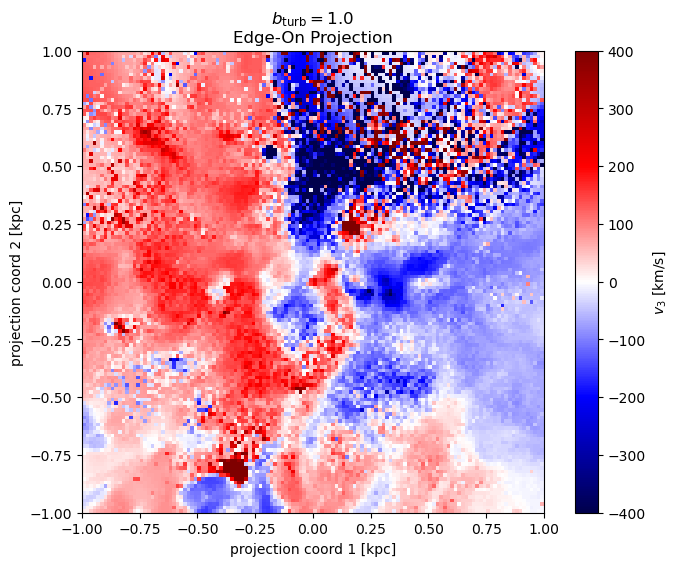

In [772]:
width = size_img

fig = plt.figure(figsize=(8, 6))
ax = plt.gca()

#im = plot_img(img_density, width, vmin=1e-23, vmax=1e-20, cmap='inferno', do_log=True)
#plt.colorbar(im, ax=ax, label=r'$\rho$ [${\rm g/cm^3}$]')

im = plot_img(img_vel_vec_z/const.km, width, vmin=-400, vmax=400, cmap='seismic', do_log=False)
plt.colorbar(im, ax=ax, label=r'$v_3$ [${\rm km/s}$]')

#coord_1d = np.linspace(-width/const.kpc/2, width/const.kpc/2, num_pxl)
#ax.streamplot(coord_1d, coord_1d, img_vel_vec_x, img_vel_vec_y, color=(0, 1, 0, 0.7), density=3)

ax.set_xlabel(r'projection coord 1 [kpc]')
ax.set_ylabel(r'projection coord 2 [kpc]')
ax.set_title(sim.sim_latex + '\nEdge-On Projection')

#save_fig('bturb0p3-edgeon-v3')


In [700]:
(coord_center + sim.left_edge) / sim.length_unit, np.array([vx_bulk, vy_bulk, vz_bulk])/const.km, j_disk

(array([0.51033727, 0.51256206, 0.49279744]),
 array([ 165.,  270., -155.]),
 array([0.92570543, 0.        , 0.37824523]))